In [2]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import HistGradientBoostingClassifier

In [3]:
train_data_desc = pd.read_csv("./df_with_200_descriptors_csv.csv")
test_data_desc = pd.read_csv("./df_test_csv.csv")

In [4]:
train_data_desc
test_data_desc['ID_vals'].nunique()

150

In [4]:
test_data_desc

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,ID_vals
0,9.626968,0.025579,9.626968,0.025579,0.624614,164.248,148.120,164.120115,66,0,...,0,0,0,0,0,0,0,0,0,1682
1,12.473362,-4.605249,12.473362,0.061165,0.617511,431.452,414.316,431.056940,152,0,...,1,1,0,0,0,0,0,0,1,1656
2,14.627193,-4.140552,14.627193,0.064351,0.224134,696.264,655.944,695.250845,254,0,...,1,0,0,0,0,0,0,0,0,36
3,10.420833,-3.973958,10.420833,0.000000,0.393203,201.244,197.212,200.949810,56,0,...,0,0,0,0,0,0,0,0,0,1850
4,12.865865,-0.601027,12.865865,0.094949,0.639062,418.574,380.270,418.271924,168,0,...,0,0,0,0,0,0,0,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10989,12.851673,-4.443395,12.851673,0.048352,0.391778,408.376,389.224,408.129692,154,0,...,0,0,0,0,0,0,0,0,0,38
10990,11.617073,-0.992448,11.617073,0.147894,0.635519,320.344,304.216,320.104859,120,0,...,0,0,0,0,0,0,0,0,0,34
10991,12.406479,-4.356493,12.406479,0.049357,0.705120,381.370,366.250,381.074304,138,0,...,1,0,0,0,0,0,0,0,1,1640
10992,11.026605,-3.480301,11.026605,0.167292,0.540194,220.976,213.920,219.945901,66,0,...,0,0,0,0,0,0,0,0,0,28


In [5]:
# Dropping null values in training data 
train_data_desc = train_data_desc.fillna(train_data_desc.mean())
# train_data_desc["HeavyAtomMolWt"] = train_data_desc["HeavyAtomMolWt"].fillna(train_data_desc["HeavyAtomMolWt"].mean())
# train_data_desc["ExactMolWt"] = train_data_desc["ExactMolWt"].fillna(train_data_desc["ExactMolWt"].mean())
# train_data_desc["NumValenceElectrons"] = train_data_desc["NumValenceElectrons"].fillna(train_data_desc["NumValenceElectrons"].mean())
# X = ['HeavyAtomMolWt', 'ExactMolWt', 'MolWt', 'MaxEStateIndex', 'MaxAbsEStateIndex','fr_thiazole', 'fr_unbrch_alkane', 'fr_thiocyan', 'fr_urea']
# # ,'NumRadicalElectrons','fr_sulfone','fr_term_acetylene','fr_tetrazole'
# scale = MinMaxScaler()
# features = train_data_desc[X]
# scale.fit(train_data_desc[X])
# train_data_desc[X] = scale.fit_transform(features.values)
# Replacing null value with 0 in test data 

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
train_data_desc['HeavyAtomMolWt'] = le.fit_transform(train_data_desc['HeavyAtomMolWt'])
train_data_desc['ExactMolWt'] = le.fit_transform(train_data_desc['ExactMolWt'])
train_data_desc['MolWt'] = le.fit_transform(train_data_desc['MolWt'])
train_data_desc['MaxEStateIndex'] = le.fit_transform(train_data_desc['MaxEStateIndex'])
train_data_desc['MaxAbsEStateIndex'] = le.fit_transform(train_data_desc['MaxAbsEStateIndex'])
train_data_desc['fr_thiazole'] = le.fit_transform(train_data_desc['fr_thiazole'])
train_data_desc['expected'] = le.fit_transform(train_data_desc['expected'])

test_data_desc = test_data_desc.fillna(test_data_desc.mean())

In [6]:
X = train_data_desc.drop("expected",axis=1)
y = train_data_desc["expected"]

# v_threshold = VarianceThreshold(threshold=0)
# v_threshold.fit(X)
# v_threshold.get_support()

In [7]:
# Using random forest algorithm 
# from sklearn.tree import DecisionTreeClassifier

# from sklearn.ensemble import RandomForestClassifier
train_data_desc

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,expected,ID_vals
0,955,-1.533785,955,0.150485,0.794714,1712,1030,1508,100,0,...,0,0,0,0,0,0,0,0,1,1644
1,1504,0.333788,1504,0.333788,0.516641,517,213,417,66,0,...,0,0,0,0,0,0,4,0,1,2451
2,101,0.000000,101,0.000000,0.251327,1924,1067,1723,148,0,...,0,0,0,0,0,0,12,0,1,1384
3,1375,-0.613825,1375,0.282361,0.487998,1343,738,1152,90,0,...,0,0,0,0,0,0,0,0,1,16
5,2361,-2.419051,2361,0.546336,0.588579,1253,639,1068,80,0,...,0,0,0,0,0,0,0,0,1,1646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75378,2092,-3.868472,2092,0.053611,0.712426,1166,621,991,82,0,...,0,0,0,0,0,0,0,0,1,33
75379,565,-2.841623,565,0.082346,0.720533,1680,981,1484,104,0,...,0,0,0,0,0,0,0,0,0,1632
75380,262,0.848333,262,0.848333,0.596343,628,335,503,50,0,...,0,0,0,1,0,0,0,0,0,1373
75381,1295,0.324028,1295,0.324028,0.519485,282,121,231,54,0,...,0,0,0,0,0,0,0,0,1,2


In [51]:
# model = DecisionTreeClassifier(random_state=13)
# model = XGBClassifier(random_state=13)
model = HistGradientBoostingClassifier(random_state=13)
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)

In [52]:
model.fit(X,y)
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(X, y)

# np.set_printoptions(precision=3)
# print(fit.scores_)

# features = fit.transform(X)
# # Summarize selected features
# print(features[0:5,:])

# X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
# X_new.shape

HistGradientBoostingClassifier(random_state=13)

In [53]:
predict = model.predict(X_test)
predict2 = le.inverse_transform(model.predict(test_data_desc))
# predict2 = model.predict(test_data_desc)
# predict2 = model.predict(test_data_desc)

In [54]:
from sklearn.metrics import f1_score

f1_score(y_test, predict, average=None).mean()

0.7578192120909142

In [30]:
print(np.count_nonzero(predict2==1))
print(np.count_nonzero(predict2==2))

711
10283


In [28]:
submission_file = pd.read_csv("./sample_submission.csv")

In [29]:
submission_file

,Id,Predicted
0,CC1=CC(=C(C=C1)C(C)(C)C)O;1682,1
1,CCS(=O)(=O)C1=C(N=CC=C1)S(=O)(=O)NC(=O)NC2=NC(...,2
2,CC1=NC2=CC=CC=C2N1C3CC4CCC(C3)N4CCC5(CCN(CC5)C...,1
3,CC1=CC(=O)[N-]S(=O)(=O)O1.[K+];1850,2
4,CCC(C)(C)C(=O)O[C@H]1C[C@H](C=C2[C@H]1[C@H]([C...,2
...,...,...
10989,CC(=NOCC1=CC=CC=C1C(=NOC)C(=O)OC)C2=CC(=CC=C2)...,1
10990,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)O)C3=CC=C(C=C3)O)...,2
10991,CC1=NC(=NC(=N1)OC)NC(=O)NS(=O)(=O)C2=CC=CC=C2C...,1
10992,COP(=O)(OC)OC=C(Cl)Cl;28,2


In [30]:
submission_file.Predicted = predict2

In [31]:
submission_file.to_csv("Submission_file_rdkit_12.csv",index=False)

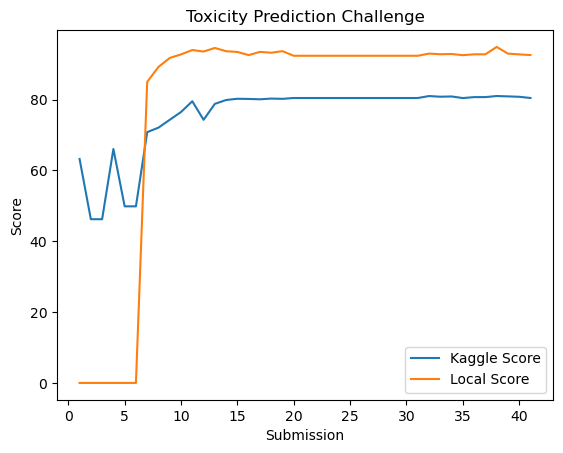

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

plot = pd.read_csv("./final_sample_score.csv")

# score = [60, 47, 48, 47, 50, 49, 49, 65, 55, 72, 72, 63, 74, 74, 76, 76, 73, 72, 78, 42, 80, 81, 80, 79, 80, 77, 65, 80, 57, 66, 55, 80, 80, 80, 60, 57, 80, 80]
# submission = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
# f1score = []

plt.plot(plot["submissions"], plot["kaggle_score_final"].iloc[::-1], label='Kaggle Score')
plt.plot(plot["submissions"], plot["my_score_final"].iloc[::-1], label='Local Score')

plt.xlabel('Submission')
plt.ylabel('Score')
# plt.legend(['Accuracy'])
# plt.legend(['F1 Score'])
plt.legend()

plt.title("Toxicity Prediction Challenge")
plt.savefig('toxicityChallenge.png')
plt.show()
